/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1: [-0.29220135  0.22724327  0.06736944  0.1690859   0.15551774 -0.15875005
 -0.0599806   0.17593489 -0.17704812  0.05385736  0.29340099  0.62622845
  2.37327012  0.32313986  0.34989772 -0.42527468  0.14788315  0.09023369
 -0.10983044]
Cluster 2: [-0.29220135  0.09645262 -0.08103152 -0.53819434  0.17308362 -0.42625126
 -0.55578085  0.08182027 -0.17704812 -0.11580343  0.29340099 -0.08452806
 -0.42135954 -0.04294818 -0.04002517 -0.19794283 -0.10950743  1.46567992
 -0.10983044]
Cluster 3: [-0.29220135 -0.37122306  0.86345812  1.69040565 -0.11057287 -0.39202552
 -0.3231832  -0.25629523 -0.17704812  0.10133445  0.29340099  0.04330103
 -0.38685794 -0.12139562 -0.15231588 -0.23673358  0.03738719  0.0469675
 -0.10983044]
Cluster 4: [-0.29220135 -0.11832447 -0.14848962 -0.26180814  0.00960921 -0.42625126
  1.79927033  0.07638012 -0.17704812 -0.12234142  0.29340099 -0.06879073
 -0.40520561 -0.07544567 -0.10754985 -0.24872174  0.05394843 -0.07389628
 -0.10983044]
Cluster 5: [-0.2142748   

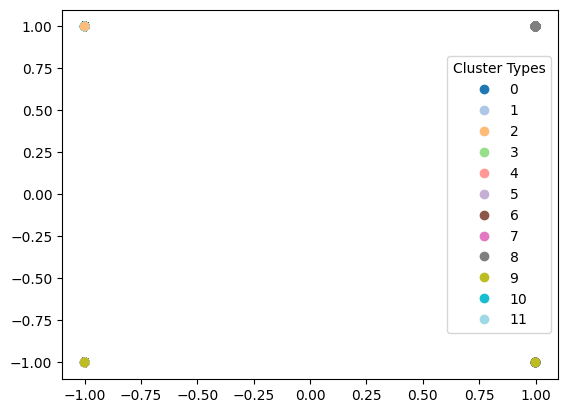

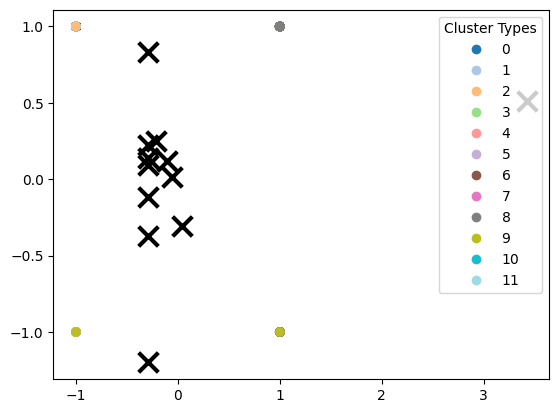

In [31]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# load data back into a dataframe from the database
mental_df = pd.read_csv('cleaned_data.csv')
mental_df

# Select the features to cluster on
features = ['Volunteered For Arts/Culture/Heritage' , 'Interested in Arts & Culture' , 'Interested in Science & Technology' ,
             'Interested in Research and independent study' ,'Interested in Sports' , 'Interested in Other competitions (eg case, debates)' ,
               'Interested in Entrepreneurship', 'Interested in Volunteering' ,'Interested in Others','Are you stressed about adjustment in new environment '
              ,'Are you worried about academic issues','Are you stressed about financial issues ' ,'Are you stressed about your family',
              'Are you anxious about friendships ','Are you happy in your romantic relationship ','Are you stressed about your health and wellbeing ',
            'Are you stressed for career ','Do you involve in clubs,activities and other events in college ','Stressed about others ']


X = mental_df[features]

# Volunteered For Arts/Culture/Heritage,Interested in Arts & Culture,Interested in Science & Technology,Interested in Research and independent study,Interested in Sports,"Interested in Other competitions (eg case, debates)",Interested in Entrepreneurship,Interested in Volunteering,Interested in Others,Are you stressed about adjustment in new environment ,Are you worried about academic issues,Are you stressed about financial issues ,Are you stressed about your family,Are you anxious about friendships ,Are you happy in your romantic relationship ,Are you stressed about your health and wellbeing ,Are you stressed for career ,"Do you involve in clubs,activities and other events in college ",Stressed about others ,Career,Year of Study,Primary Programme,Gender,Housing Type,Q2-How many events have you Participated in ?,Q3-How many activities are you Interested in ?,Q5-What are your levels of stress ?,Q6-How Satisfied You are with your Student Life ?,Q7-How much effort do you make to interact with others ?,Q8-About How events are you aware about ?,Q9-What is an ideal student life ?

# # Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Initialize the KMeans model
k = 12
kmeans = KMeans(n_clusters=k, random_state=42)

#Fit the KMeans model to the scaled data
kmeans.fit(X_scaled)

#Get the cluster labels
labels = kmeans.labels_

#Add the cluster labels to the original data
mental_df['cluster'] = labels

mental_df['cluster'].nunique()

#Visualize the clustering results
scatter=plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='tab20')

# Get the cluster centers
centers = kmeans.cluster_centers_

# Print the coordinates of the centroids for each cluster
for i in range(k):
    print("Cluster {}: {}".format(i+1, centers[i]))

# Add legend
plt.legend(*scatter.legend_elements(), title="Cluster Types")

plt.show()

# Find the cluster centroids
centroids = kmeans.cluster_centers_

# Visualize the clustering results with centroids
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='tab20')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='k')

# Add legend
plt.legend(*scatter.legend_elements(), title="Cluster Types")

plt.show()



In [26]:
# cluster_names = {
#     0: 'Other',
#     1: 'Mood Disorder',
#     2: 'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)',
#     3: 'Eating Disorder (Anorexia, Bulimia, etc)',
#     4: 'Attention Deficit Hyperactivity Disorder',
#     5: 'Personality Disorder (Borderline, Antisocial, Paranoid, etc)',
#     6: 'Obsessive-Compulsive Disorder',
#     7: 'Post-traumatic Stress Disorder',
#     8: 'Stress Response Syndromes',
#     9: 'Dissociative Disorder',
#     10: 'Substance Use Disorder',
#     11: 'Addictive Disorder'
# }


In [27]:
#mental_df['Type of Disorder'] = mental_df['cluster'].map(cluster_names)


In [32]:
mental_df

,Volunteered For Arts/Culture/Heritage,Interested in Arts & Culture,Interested in Science & Technology,Interested in Research and independent study,Interested in Sports,"Interested in Other competitions (eg case, debates)",Interested in Entrepreneurship,Interested in Volunteering,Interested in Others,Are you stressed about adjustment in new environment,...,Primary Programme,Gender,Housing Type,Q2-How many events have you Participated in ?,Q3-How many activities are you Interested in ?,Q5-What are your levels of stress ?,Q6-How Satisfied You are with your Student Life ?,Q7-How much effort do you make to interact with others ?,Q8-About How events are you aware about ?,cluster
0,-1.0,-1,-1,-1,1,-1,-1,-1,-1,-1,...,Bachelor of Science,Male,Halls,1,1,2,2,2.0,2.0,5
1,1.0,-1,1,1,-1,-1,-1,1,-1,1,...,Bachelor of Engineering,Male,Halls,4,3,7,1,1.0,1.0,4
2,-1.0,-1,1,1,-1,-1,1,1,-1,-1,...,Bachelor of Engineering,Female,Out of Campus,3,4,4,2,2.0,2.0,2
3,-1.0,1,1,-1,1,-1,-1,-1,-1,-1,...,Bachelor of Science,Female,Residential Colleges,2,3,2,3,3.0,1.0,10
4,-1.0,1,-1,-1,1,-1,1,1,-1,-1,...,Bachelor of Business Admin,Female,Out of Campus,2,4,3,2,2.0,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,1.0,1,1,1,1,-1,1,-1,-1,-1,...,Bachelor of Science,Male,Halls,3,5,1,2,2.0,2.0,8
1674,-1.0,-1,1,1,1,-1,-1,1,-1,1,...,Bachelor of Engineering,Male,Halls,3,4,5,2,2.0,2.0,2
1675,-1.0,1,-1,-1,-1,1,-1,1,-1,-1,...,Bachelor of Engineering,Male,Halls,1,3,1,2,2.0,2.0,11
1676,-1.0,-1,-1,-1,-1,-1,1,-1,-1,-1,...,Bachelor of Science (SDE),Male,Halls,2,1,1,2,2.0,2.0,9


In [33]:
mental_df.to_csv('output_disorders.csv', index=False)

In [35]:
# Get the number of rows and columns
num_rows, num_cols = mental_df.shape

# Print the number of rows and columns
print("Number of rows: {}".format(num_rows))
print("Number of columns: {}".format(num_cols))

Number of rows: 1678
Number of columns: 31


Bad pipe message: %s [b"1\x8f|\xceU\x9dL\xce\xfb\x1d\x82\xea\xc1\r\x8e\x98\xef.\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<"]
Bad pipe message: %s [b"\xfc3\xbc\xac\xc5]\x92\xf3\x04q\x1c\x9b\xf47\x1c\x14T\xbb\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0s\xc0w\x00\xc4\x00\xc3\xc0#\xc0'\x00g\x00@\xc0r\xc0v\x00\xbe\x00\xbd\xc0\n\xc0\x14\x009\x008\x00\x88\x00", b'\t\xc0\x13\x003\x002\x00\x9a\x00\x99\x00E\x00D\xc0\x07\xc0\x11\xc0\x08\xc0\x12\x00\x16\x00\x13\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00\xc0